# “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib. 

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

Создайте датафреймы X и y из этих данных.

In [4]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [9]:
from sklearn.manifold import TSNE

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

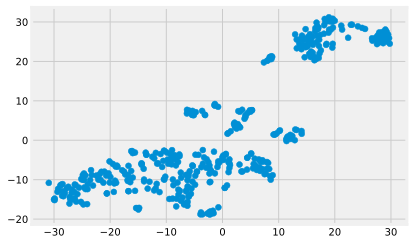

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = model.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,и раскрасьте точки из разных кластеров разными цветами.

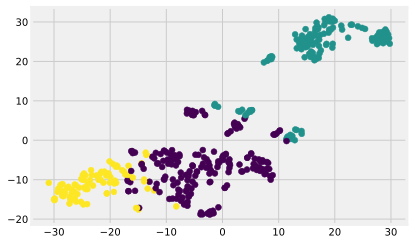

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [15]:
print('Средние значения price:')
print('Первый кластер: ', y_train[labels_train == 0].mean())
print('Второй кластер:', y_train[labels_train == 1].mean())
print('Третий кластер:', y_train[labels_train == 2].mean())

Средние значения price:
Первый кластер:  price    24.971204
dtype: float64
Второй кластер: price    16.179688
dtype: float64
Третий кластер: price    27.874118
dtype: float64


In [16]:
print('Средние значения CRIM:')
print('Первый кластер: ', X_train['CRIM'][labels_train == 0].mean())
print('Второй кластер:', X_train['CRIM'][labels_train == 1].mean())
print('Третий кластер:', X_train['CRIM'][labels_train == 2].mean())

Средние значения CRIM:
Первый кластер:  0.42098554973821994
Второй кластер: 10.7152190625
Третий кластер: 0.0721184705882353


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [17]:
labels_test = model.predict(X_test_scaled)

In [18]:
print('Средние значения price:')
print('Первый кластер: ', y_test[labels_test == 0].mean())
print('Второй кластер: ', y_test[labels_test == 1].mean())
print('Третий кластер: ', y_test[labels_test == 2].mean())

Средние значения price:
Первый кластер:  price    21.860784
dtype: float64
Второй кластер:  price    16.437143
dtype: float64
Третий кластер:  price    31.35
dtype: float64


In [19]:
print('Средние значения CRIM:')
print('Первый кластер: ', X_test.loc[labels_test == 0, 'CRIM'].mean())
print('Второй кластер: ', X_test.loc[labels_test == 1, 'CRIM'].mean())
print('Третий кластер: ', X_test.loc[labels_test == 2, 'CRIM'].mean())

Средние значения CRIM:
Первый кластер:  0.2660788235294118
Второй кластер:  10.165531142857143
Третий кластер:  0.06206
